In [1]:
from rllab.algos.trpo import TRPO
from rllab.baselines.linear_feature_baseline import LinearFeatureBaseline
from rllab.envs.gym_env import GymEnv
from rllab.envs.normalized_env import normalize
from rllab.policies.gaussian_mlp_policy import GaussianMLPPolicy
from rllab.policies.constant_control_policy import ConstantControlPolicy
import rllab.misc.logger as logger
from rllab.sampler import parallel_sampler
from test import test_const_adv, test_rand_adv, test_learnt_adv, test_rand_step_adv, test_step_adv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import gym
import random
import pickle
import scipy
import argparse

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


### Load

In [66]:
#filepath = 'results/Swimmer/env-SwimmerAdv-v1_Exp1_Itr500_BS25000_Adv0.25_stp0.01_lam0.97_435321.p'
#filepath = 'results/Hopper/env-HopperAdv-v1_Exp1_Itr500_BS25000_Adv0.25_stp0.01_lam1.0_369983_320.p'
#filepath = 'results/Cheetah/env-HalfCheetahAdv-v1_Exp1_Itr500_BS25000_Adv0.25_stp0.02_lam0.95_95277.p'
filepath = 'results/Walker/env-Walker2dAdv-v1_Exp1_Itr500_BS25000_Adv0.25_stp0.01_lam0.97_516354.p'
filtercheck = 1

savename = filepath #filepath to results
if_filtering = bool(filtercheck) #0 for no filtering. 1 for filtering

res_D = pickle.load(open(savename,'rb'))
args = res_D['args']
pro_policy = res_D['pro_policy']
adv_policy = res_D['adv_policy']
const_test_rew_summary = res_D['zero_test']
rand_test_rew_summary = res_D['rand_test']
adv_test_rew_summary = res_D['adv_test']

### Graph

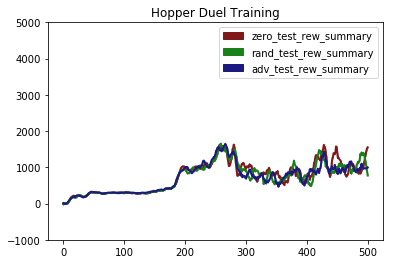

In [70]:
plot_tests = [const_test_rew_summary, rand_test_rew_summary, adv_test_rew_summary]
plot_names = ['zero_test_rew_summary', 'rand_test_rew_summary', 'adv_test_rew_summary']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1), (0.1,0.1,0.5)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [i for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))

plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-1000,5000])
plt.title("Hopper Duel Training")
plt.show()

In [71]:
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    print(mean_con[len(mean_con)-1], std_con[len(std_con)-1])

1551.74890375 0.0
775.124605881 0.0
998.767541625 0.0


### Render

In [4]:
env_name = args[0]
adv_fraction = args[12]
env = normalize(GymEnv(env_name, 5.0))
env_orig = normalize(GymEnv(env_name, 1.0))

2018-01-25 07:13:58.217877 EST | Warning: skipping Gym environment monitoring since snapshot_dir not configured.


[2018-01-25 07:13:58,222] Making new env: HopperAdv-v1


2018-01-25 07:13:58.684160 EST | Warning: skipping Gym environment monitoring since snapshot_dir not configured.


[2018-01-25 07:13:58,687] Making new env: HopperAdv-v1


In [5]:
test_const_adv(env_orig, pro_policy, path_length=1000, n_traj=1, render=True)

3602.780389565386

In [6]:
test_learnt_adv(env, pro_policy, adv_policy, path_length=1000, n_traj=1, render=True)

288.77897701269262

### Test Rewards

In [6]:
print(test_const_adv(env, pro_policy, path_length=1000))
print(test_rand_adv(env, pro_policy, path_length=1000))
print(test_step_adv(env, pro_policy, path_length=1000))
print(test_rand_step_adv(env, pro_policy, path_length=1000))
print(test_learnt_adv(env, pro_policy, adv_policy, path_length=1000))

1695.35623211
1441.26083446
1481.11238529
1368.74142163
1539.87371107


In [7]:
print(test_learnt_adv(env_orig, pro_policy, adv_policy, path_length=1000))

1635.81699446
